In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_gbq

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import arap_helpers
from arap_helpers import QueryTable, AlternateProducts, get_prod_catalog, get_subcategory 

project_id = "cp-gaa-visualization-dev"

In [3]:
sql_query = """
SELECT
  start_date,
  asin,
  product_title,
  n1_purchased_asin,
  n1_purchased_product_title,
  n1_purchased_percent,
  n2_purchased_asin,
  n2_purchased_product_title,
  n2_purchased_percent,
  n3_purchased_asin,
  n3_purchased_product_title,
  n3_purchased_percent
FROM 
  `cp-gaa-visualization-dev.arap.alternate_purchase_wly` 
WHERE 
  country = 'USA'
"""

In [4]:
qry = QueryTable(sql_query)

In [5]:
alt_purchase = qry.query_table()

Downloading: 100%|██████████| 122817/122817 [00:19<00:00, 6191.63rows/s]


### Alternate Products: Toothpaste

In [6]:
prod_catalog = get_prod_catalog(alt_purchase)
alt_purchase_toothpaste = get_subcategory(alt_purchase)

There are 2644 unique products


In [8]:
alt = AlternateProducts(alt_purchase_toothpaste, prod_catalog, 'n1_purchased_product_title', brand='Colgate', keyword='Toothpaste')

In [11]:
alt_purchase_1 = alt.flag_alt_products()

In [12]:
alt = AlternateProducts(alt_purchase_toothpaste, prod_catalog, 'n2_purchased_product_title', brand='Colgate', keyword='Toothpaste')

In [13]:
alt_purchase_2 = alt.flag_alt_products()
#alt_purchase_2.head()

In [14]:
alt = AlternateProducts(alt_purchase_toothpaste, prod_catalog, 'n3_purchased_product_title', brand='Colgate', keyword='Toothpaste')
alt_purchase_3 = alt.flag_alt_products()

In [15]:
alt_purchase_merged = alt.merge_table(alt_purchase_1, alt_purchase_2, alt_purchase_3)

In [16]:
alt_purchase_merged.head(3)

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,n2_purchased_product_title,n2_internal,n2_substitute,n3_purchased_product_title,n3_internal,n3_substitute
0,2019-12-08,B01BNEYGQU,Colgate Kids Toothpaste Pump Maximum Cavity Pr...,Disney Plus Yearly with 7 Day FT,no,no,Pokémon XY Evolutions Bundle,no,no,LEGO Creator 3in1 Shuttle Transporter 31091 Bu...,no,no
1,2019-12-08,B01BNEZOJ8,Colgate Sparkling White Gel Toothpaste Mint Zi...,Shock Doctor Double Braces Mouth Guard – Upper...,no,no,Shock Doctor Double Braces Mouth Guard Upper ...,no,no,Pro DJ Laptop Projector Stand - Adjustable Lap...,no,no
2,2019-12-08,B0752NJ4H7,Colgate Total Daily Repair Toothpaste - 5.8 ounce,Oral-B Glide Pro-Health Comfort Plus Dental Fl...,no,no,Bad air sponge odor neutralant neutralizes and...,no,no,GUM Soft-Picks Original Dental Picks 320 Count,no,no


no     50.279033
yes    49.720967
Name: n1_internal, dtype: float64


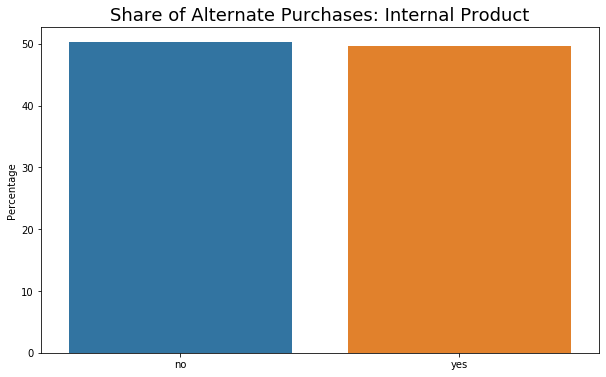

In [17]:
alt.show_internal_external(alt_purchase_merged.n1_internal)

no     94.567404
yes     5.432596
Name: n1_substitute, dtype: float64


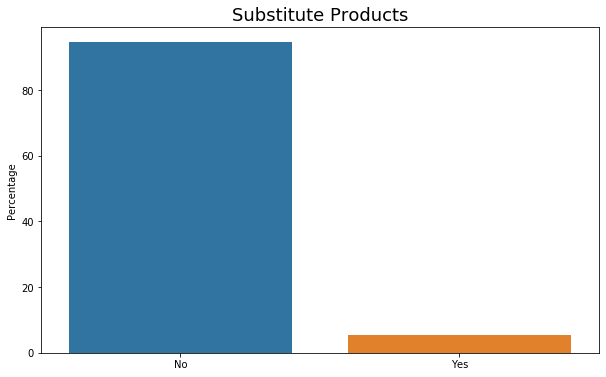

In [18]:
alt.show_substitutes(alt_purchase_merged.n1_substitute)

no     50.279033
yes    49.720967
Name: n1_internal, dtype: float64
************

no     66.94127
yes    33.05873
Name: n2_internal, dtype: float64
************

no     75.771611
yes    24.228389
Name: n3_internal, dtype: float64


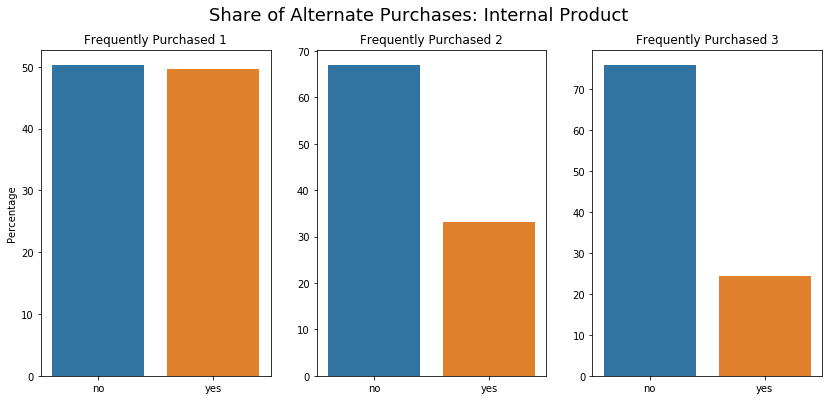

In [19]:
alt.show_internal_external_subplot(alt_purchase_merged.n1_internal, 
                                   alt_purchase_merged.n2_internal,
                                  alt_purchase_merged.n3_internal)

no     94.567404
yes     5.432596
Name: n1_substitute, dtype: float64
************

no     92.919783
yes     7.080217
Name: n2_substitute, dtype: float64
************

no     91.985878
yes     8.014122
Name: n3_substitute, dtype: float64


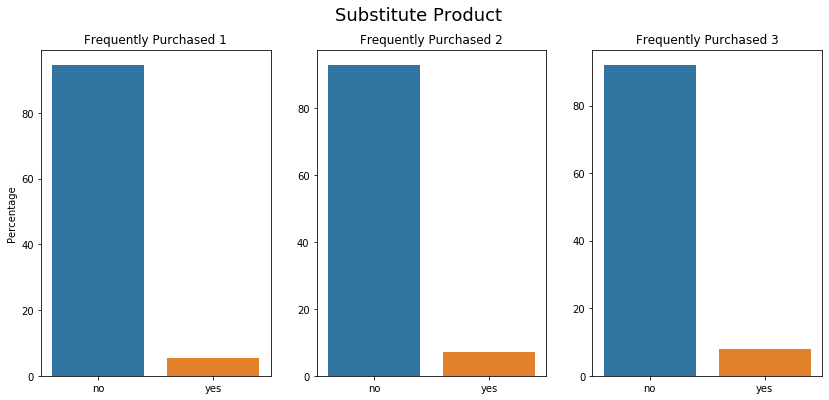

In [20]:
alt.show_substitues_subplot(alt_purchase_merged.n1_substitute,
                           alt_purchase_merged.n2_substitute,
                           alt_purchase_merged.n3_substitute)

### Alternate Products: Toothbrush

In [21]:
alt_purchase_toothbrush = get_subcategory(alt_purchase, keyword='Toothbrush')

In [22]:
alt = AlternateProducts(alt_purchase_toothbrush, prod_catalog, 'n1_purchased_product_title', brand='Colgate', keyword='Toothbrush')

In [23]:
alt_purchase_1 = alt.flag_alt_products()

In [24]:
alt_purchase_1.head()

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute
0,2019-12-08,B00UB6T4SM,Colgate Total 360 Adult Soft Manual Toothbrush...,Nutramax Cosequin DS PLUS MSM Chewable Tablets...,no,no
1,2019-12-08,B07W7WFHTX,Colgate Essentials Charcoal Teeth Whitening To...,Colgate Essentials Charcoal Teeth Whitening To...,yes,no
2,2019-12-08,B0795WDX1R,Colgate 360 Medium Toothbrush with Tongue and ...,Sensodyne Pronamel Gentle Whitening Sensitive ...,no,no
3,2019-12-08,B005HIJL64,Colgate 360° Optic White Whitening Toothbrush ...,Colgate 360 Optic White Whitening Toothbrush S...,yes,no
4,2019-12-08,B009359FD6,Colgate 360 Optic White Battery Toothbrush Rep...,Tombow 56190 Beginner Lettering Set. Includes ...,no,no


In [25]:
alt = AlternateProducts(alt_purchase_toothbrush, prod_catalog, 'n2_purchased_product_title', brand='Colgate', keyword='Toothbrush')

In [26]:
alt_purchase_2 = alt.flag_alt_products()

In [27]:
alt = AlternateProducts(alt_purchase_toothbrush, prod_catalog, 'n3_purchased_product_title', brand='Colgate', keyword='Toothbrush')

In [28]:
alt_purchase_3 = alt.flag_alt_products()

In [29]:
alt_purchase_merged = alt.merge_table(alt_purchase_1, alt_purchase_2, alt_purchase_3)

In [30]:
alt_purchase_merged.head(3)

,start_date,asin,product_title,n1_purchased_product_title,n1_internal,n1_substitute,n2_purchased_product_title,n2_internal,n2_substitute,n3_purchased_product_title,n3_internal,n3_substitute
0,2019-12-08,B00UB6T4SM,Colgate Total 360 Adult Soft Manual Toothbrush...,Nutramax Cosequin DS PLUS MSM Chewable Tablets...,no,no,Oral-B 3D White Luxe Pro-Flex 38 Medium Manual...,no,yes,Quest Nutrition Double Chocolate Chip Protein ...,no,no
1,2019-12-08,B07W7WFHTX,Colgate Essentials Charcoal Teeth Whitening To...,Colgate Essentials Charcoal Teeth Whitening To...,yes,no,Colgate Slimsoft Floss-Tip Charcoal Toothbrush...,yes,no,Colgate Essentials Charcoal Teeth Whitening To...,yes,no
2,2019-12-08,B0795WDX1R,Colgate 360 Medium Toothbrush with Tongue and ...,Sensodyne Pronamel Gentle Whitening Sensitive ...,no,no,SheaMoisture Manuka Honey & Mafura Oil Intensi...,no,no,Colgate 360 Optic White Whitening Toothbrush S...,yes,no


no     58.519661
yes    41.480339
Name: n1_internal, dtype: float64


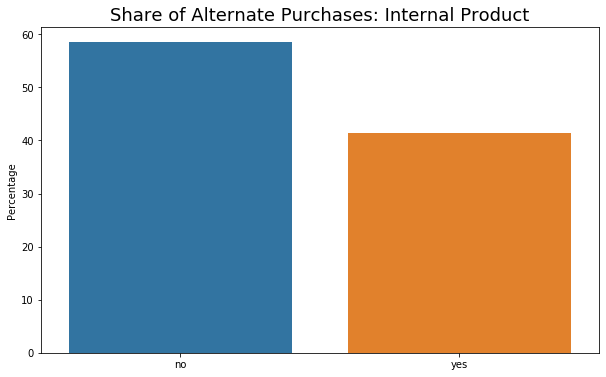

In [31]:
alt.show_internal_external(alt_purchase_merged.n1_internal)

no     86.187906
yes    13.812094
Name: n1_substitute, dtype: float64


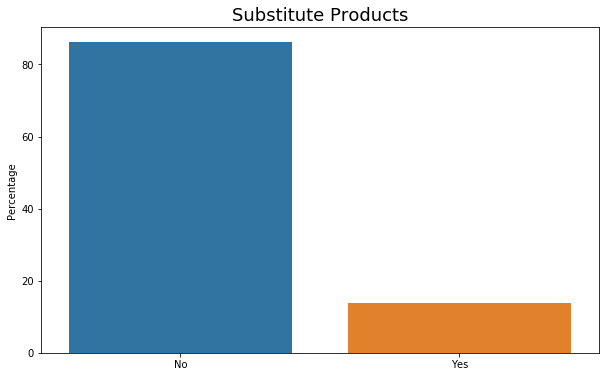

In [32]:
alt.show_substitutes(alt_purchase_merged.n1_substitute)

no     58.519661
yes    41.480339
Name: n1_internal, dtype: float64
************

no     70.172927
yes    29.827073
Name: n2_internal, dtype: float64
************

no     77.414914
yes    22.585086
Name: n3_internal, dtype: float64


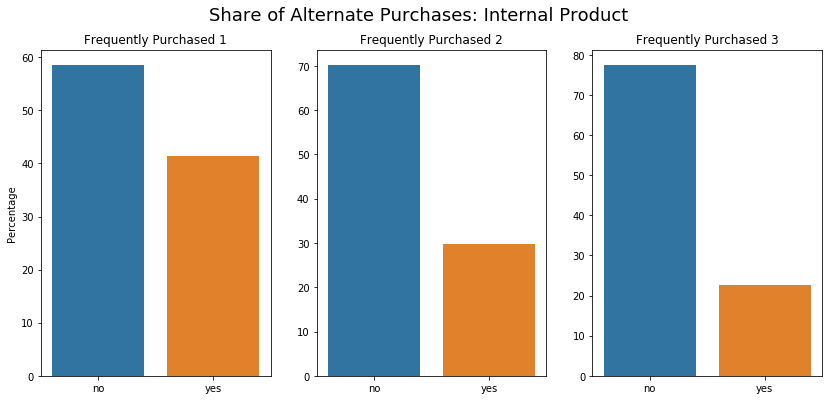

In [33]:
alt.show_internal_external_subplot(alt_purchase_merged.n1_internal, 
                                   alt_purchase_merged.n2_internal,
                                  alt_purchase_merged.n3_internal)

no     86.187906
yes    13.812094
Name: n1_substitute, dtype: float64
************

no     86.198921
yes    13.801079
Name: n2_substitute, dtype: float64
************

no     86.127327
yes    13.872673
Name: n3_substitute, dtype: float64


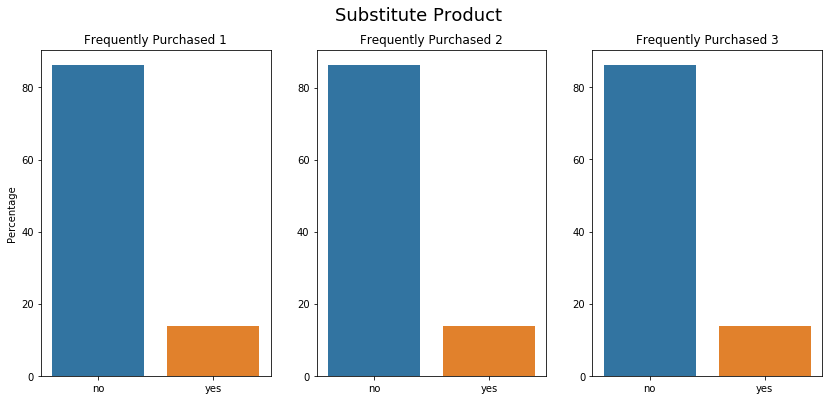

In [34]:
alt.show_substitues_subplot(alt_purchase_merged.n1_substitute,
                           alt_purchase_merged.n2_substitute,
                           alt_purchase_merged.n3_substitute)

In [ ]:
alt_p = AlternateProducts(hills_alt_purchase, prod_catalog, 'n1_purchased_product_title', brand="Hill's", keyword = "Hill's")

In [ ]:
hills_alt_product_1 = alt_p.flag_alt_products()

In [ ]:
alt_p = AlternateProducts(hills_alt_purchase, prod_catalog, 'n2_purchased_product_title', brand="Hill's", keyword = "Hill's")
hills_alt_product_2 = alt_p.flag_alt_products()

In [ ]:
alt_p = AlternateProducts(hills_alt_purchase, prod_catalog, 'n3_purchased_product_title', brand="Hill's", keyword = "Hill's")
hills_alt_product_3 = alt_p.flag_alt_products()

In [ ]:
hills_alt_product_merged = alt_p.merge_table(hills_alt_product_1, hills_alt_product_2, hills_alt_product_3)

In [ ]:
hills_alt_product_merged.head()

In [ ]:
alt_p.show_internal_external_subplot(hills_alt_product_merged.n1_internal,
                                    hills_alt_product_merged.n2_internal,
                                    hills_alt_product_merged.n3_internal,)

In [ ]:
alt_p.show_substitues_subplot(hills_alt_product_merged.n1_substitute,
                             hills_alt_product_merged.n2_substitute,
                             hills_alt_product_merged.n3_substitute)